## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Tweet Twitter terkait COVID-19 periode April hingga Juni 2021. 
##### 1. Analisis Sentimen terhadap Tweet terkait COVID-19. Data Tweet yang dikumpulkan selama periode April hingga Juni 2021. Tujuan Analisis	Untuk mengidentifikasi dan mengukur opini (positif, negatif, atau netral) publik di Twitter mengenai pandemi COVID-19 selama periode tersebut. Kolom Teks Utama	original_text (teks asli) . Data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Berikut merupakan penjelasan untuk kolom-kolom kunci:
1. ID unik dari tweet tersebut.
2. created_at  Tanggal dan waktu tweet dibuat.
3. original_text  Konten teks tweet yang sebenarnya (sebelum pembersihan).
4. clean_tweetKonten teks tweet setelah melalui proses cleaning (menghilangkan link, tanda baca, dsb.). Ini adalah kolom utama yang akan dianalisis.
5. original_author  Pengguna yang membuat tweet tersebut.
6. retweet_count  Engagement Jumlah retweet yang diterima tweet tersebut.
7. favorite_count  Engagement Jumlah like (favorite) yang diterima tweet tersebut.
8. ompound  Skor sentimen gabungan (biasanya antara -1.0 dan 1.0), digunakan untuk menentukan polaritas.
9. neg Hasil  sentimen negatif (antara 0 dan 1).
10. neu Hasil  sentimen netral (antara 0 dan 1).
11. pos Hasil  sentimen positif (antara 0 dan 1).
12. sentiment Label polaritas akhir (misalnya, 'Positif', 'Negatif', 'Netral') yang diturunkan dari skor-skor di atas.

##### 3. Import Library

In [1]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi (opsional, tapi disarankan)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Natural Language Processing (NLP) dan Sentimen
# NLTK adalah salah satu library dasar
import nltk
nltk.download('wordnet')
#untuk labeling
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

# nltk.download(['punkt', 'stopwords', 'vader_lexicon']) # Jalankan ini jika Anda belum memiliki paket-paket ini
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Algoritma sentimen populer
# Atau library yang lebih canggih seperti transformer dari Hugging Face
# from transformers import pipeline


[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4. Load Data

In [3]:

# Tentukan path file CSV Anda
file_path_csv = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv'

# Tentukan nama kolom yang berisi teks yang akan dianalisis
# Kolomnya adalah 'clean_tweet' yaitu text yang sudah bersih
TEXT_COLUMN_NAME = 'clean_tweet' 


try:
    # Load data
    df = pd.read_csv(file_path_csv)
    print("✅ DataFrame berhasil dimuat.")
    
    # Pemeriksaan Awal Data
    print("\n---- INFO DATA AWAL ----")
    print(f"Jumlah Baris/Tweet: {len(df)}")
    print(f"Kolom yang tersedia: {list(df.columns)}")
    print("\nRingkasan Tipe Data:")
    print(df.info())
    
    # -------------------------------------------------------------
    # Penyiapan Kolom Teks
    # -------------------------------------------------------------
    # if TEXT_COLUMN_NAME not in df.columns:
    #     print(f"\n ERROR: Kolom '{TEXT_COLUMN_NAME}' tidak ditemukan.")
    # else:
    #     # Menghapus baris dengan nilai kosong (NaN) di kolom teks utama
    #     df.dropna(subset=[TEXT_COLUMN_NAME], inplace=True)
        
    #     # Menghapus duplikat berdasarkan teks yang bersih
    #     df.drop_duplicates(subset=[TEXT_COLUMN_NAME], inplace=True)
        
    #     # Reset Index setelah penghapusan
    #     df.reset_index(drop=True, inplace=True)
        
    #     print("\n--- Data Setelah Pembersihan Awal ---")
    #     print(f"Total Baris Akhir: {len(df)}")
    #     print(f"5 Baris Pertama Kolom '{TEXT_COLUMN_NAME}':")
    #     print(df[TEXT_COLUMN_NAME].head())
        
    #     # Dataframe 'df' kini siap untuk analisis lanjutan
        
except FileNotFoundError:
    print(f" Error: File CSV tidak ditemukan di {file_path_csv}. Pastikan path benar.")
    
except Exception as e:
    print(f" Terjadi kesalahan saat membaca file: {e}")

✅ DataFrame berhasil dimuat.

---- INFO DATA AWAL ----
Jumlah Baris/Tweet: 147475
Kolom yang tersedia: ['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']

Ringkasan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147475 entries, 0 to 147474
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               147475 non-null  int64  
 1   created_at       147475 non-null  object 
 2   source           147475 non-null  object 
 3   original_text    147475 non-null  object 
 4   lang             147474 non-null  object 
 5   favorite_count   147474 non-null  float64
 6   retweet_count    147474 non-null  float64
 7   original_author  147474 non-null  object 
 8   hashtags         38419 non-null   object 
 9   user_mentions    100637 non-null 

## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [4]:
print(f"Jumlah baris dalam data: {len(df)}")

Jumlah baris dalam data: 147475


#### 2. Panjang Rata - Rata Setiap Baris

In [6]:
# 2. Panjang Rata-rata Setiap Baris
# Pastikan kolom 'clean_tweet' adalah string, lalu hitung panjangnya (jumlah karakter)
df['length'] = df['clean_tweet'].astype(str).apply(len)
average_length = df['length'].mean()

print(f"Panjang Rata-rata Tweet (jumlah karakter): {average_length:.2f} karakter")

Panjang Rata-rata Tweet (jumlah karakter): 59.35 karakter


#### 3. Cek Data Duplikasi

In [7]:
# 3. Cek Data Duplikasi pada kolom 'clean_tweet'
duplicated_count = df.duplicated(subset=['clean_tweet']).sum()

if duplicated_count > 0:
    print(f"Jumlah Data Duplikat (berdasarkan clean_tweet): {duplicated_count}")
    # Jika Anda ingin menghapus duplikat (seperti yang disarankan sebelumnya)
    df.drop_duplicates(subset=['clean_tweet'], inplace=True)
    print(f"Jumlah Baris Data setelah menghapus duplikat: {len(df)}")
else:
    print("Tidak ditemukan Data Duplikat pada clean_tweet.")

Jumlah Data Duplikat (berdasarkan clean_tweet): 14789
Jumlah Baris Data setelah menghapus duplikat: 132686


#### 4. Cek Data Kosong

In [8]:
# 4. Cek Data Kosong (Missing Values)
print("\nJumlah Data Kosong per Kolom:")
print(df.isnull().sum())

# Penting: Cek apakah ada 'clean_tweet' yang kosong setelah di cleaning (string kosong "")
empty_string_count = (df['clean_tweet'] == "").sum()
print(f"\nJumlah 'clean_tweet' yang merupakan string kosong (''): {empty_string_count}")

# Membersihkan data kosong dan string kosong
df.dropna(subset=['clean_tweet'], inplace=True)
df = df[df['clean_tweet'] != ""] 
df.reset_index(drop=True, inplace=True)
print(f"Jumlah Baris Data setelah membersihkan nilai kosong: {len(df)}")


Jumlah Data Kosong per Kolom:
id                     0
created_at             0
source                 0
original_text          0
lang                   1
favorite_count         1
retweet_count          1
original_author        1
hashtags           98421
user_mentions      39968
place              39290
clean_tweet            1
compound               0
neg                    0
neu                    0
pos                    0
sentiment              0
length                 0
dtype: int64

Jumlah 'clean_tweet' yang merupakan string kosong (''): 0
Jumlah Baris Data setelah membersihkan nilai kosong: 132685


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [ ]:
if 'clean_tweet' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='clean_tweet', data=df, palette='viridis')
    plt.title('Distribusi Label Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah Tweet')
    plt.show()
else:
    print("\nKolom 'clean_tweet' belum tersedia untuk visualisasi distribusi sentimen.")

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_6568\3836307559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clean_tweet', data=df, palette='viridis')


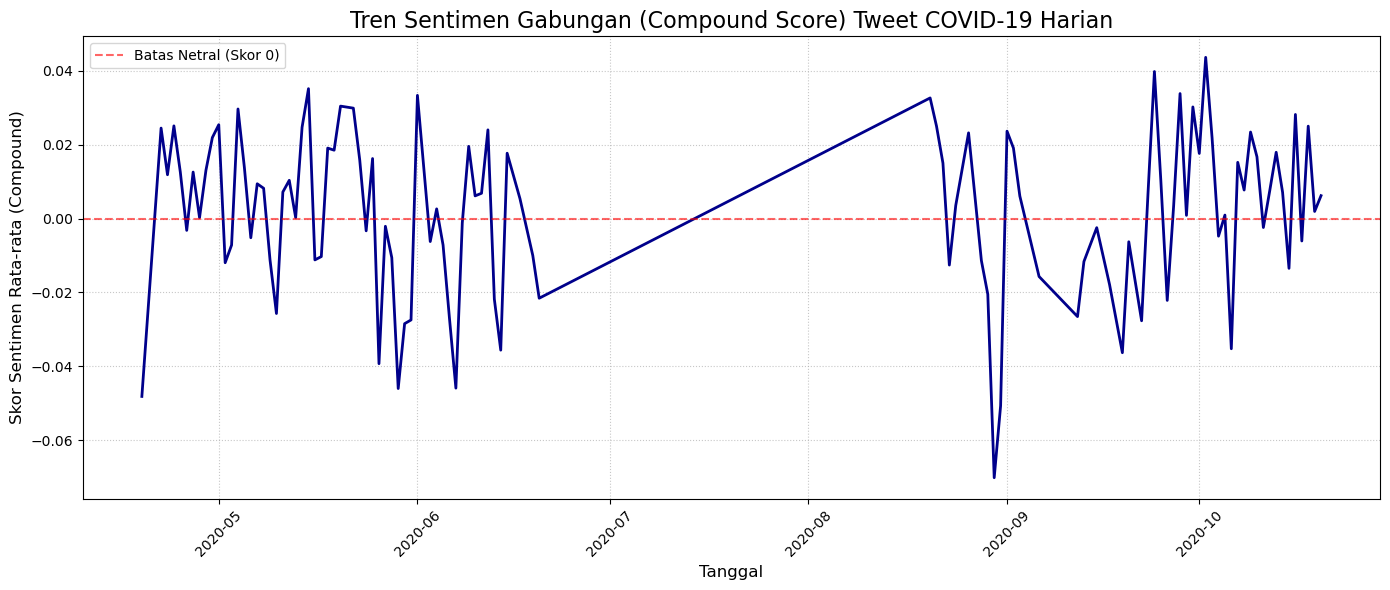

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi: df sudah dimuat dan kolom 'created_at' & 'compound' ada

# --- Langkah 1: Konversi Kolom Tanggal ---
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['date'] = df['created_at'].dt.date

# --- Solusi: Konversi Kolom Sentimen ke Numerik (WAJIB) ---
# Mengubah tipe data kolom 'compound' ke float
df['compound'] = pd.to_numeric(df['compound'], errors='coerce') 

# Menghapus baris yang memiliki nilai NaN pada 'compound' setelah konversi
# (Ini penting agar mean() tidak terpengaruh oleh nilai yang tidak valid)
df.dropna(subset=['compound'], inplace=True)
df.dropna(subset=['date'], inplace=True) # Hapus baris dengan tanggal tidak valid

# --- Langkah 2: Hitung Rata-rata Sentimen Harian ---
sentiment_trend = df.groupby('date')['compound'].mean().reset_index()

sentiment_trend['date'] = pd.to_datetime(sentiment_trend['date'])

# --- Langkah 3: Membuat Line Chart (Visualisasi) ---
plt.figure(figsize=(14, 6))

sns.lineplot(
    x='date', 
    y='compound', 
    data=sentiment_trend, 
    color='darkblue',
    linewidth=2
)

plt.title('Tren Sentimen Gabungan (Compound Score) Tweet COVID-19 Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Skor Sentimen Rata-rata (Compound)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.6, label='Batas Netral (Skor 0)')

plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

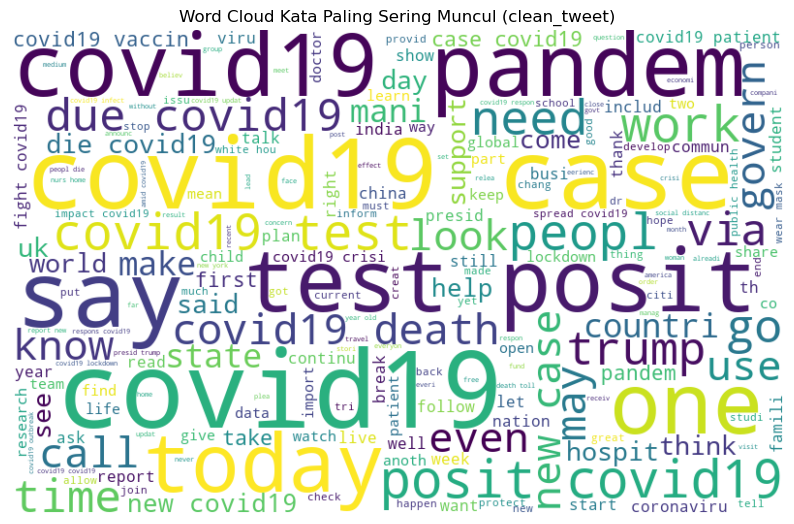

In [42]:

# Menggabungkan semua teks menjadi satu string besar
all_words = ' '.join([text for text in df['clean_tweet']])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=500, 
                    random_state=21, max_font_size=110, 
                    background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud Kata Paling Sering Muncul (clean_tweet)')
plt.show()

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [3]:

print("--- Memulai Tokenisasi ---")

df['tokenized_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))

print("Tokenisasi Selesai.")
print(df[['clean_tweet', 'tokenized_tweet']].head(5))

--- Memulai Tokenisasi ---


NameError: name 'df' is not defined

#### 2. Lemmatization dan Stemming

In [54]:
from nltk.stem import WordNetLemmatizer
# Pastikan Anda sudah menjalankan: nltk.download('wordnet')

print("\n--- Memulai Lemmatization (Menggantikan Stemming) ---")

# Inisialisasi Lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(tokens):
    """Menerapkan Lemmatization ke daftar token."""
    # Lemmatisasi setiap token
    # Catatan: Lemmatizer NLTK bisa lebih efektif jika mengetahui POS (Part of Speech),
    # tetapi untuk kesederhanaan, kita terapkan secara default.
    return [lemmatizer.lemmatize(word) for word in tokens]

# Aplikasikan Lemmatization pada kolom 'tokenized_tweet'
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(apply_lemmatization)

print("Lemmatization Selesai.")
print("Contoh Hasil (Kolom 'lemmatized_tweet'):")
# Tampilkan perbandingan token asli dan hasil lemmatization
print(df[['tokenized_tweet', 'lemmatized_tweet']].head(2))


--- Memulai Lemmatization (Menggantikan Stemming) ---
Lemmatization Selesai.
Contoh Hasil (Kolom 'lemmatized_tweet'):
                                     tokenized_tweet  \
0  [call, leader, help, protect, refuge, covid19,...   
1  [ogun, state, support, cbn, nirsal, covid19, t...   

                                    lemmatized_tweet  
0  [call, leader, help, protect, refuge, covid19,...  
1  [ogun, state, support, cbn, nirsal, covid19, t...  


#### 3. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [55]:

print("\n--- Memulai Stopword Removal ---")

english_stopwords = set(stopwords.words('english'))

def apply_stopword_removal(tokens):
    # Hapus Stopwords Kata Bahasa Inggris
    tokens_clean = [word for word in tokens if word not in english_stopwords]
    
    # Hapus Angka, Tanda Baca, dan Karakter Tunggal
    tokens_final = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens_clean]
    tokens_final = [word for word in tokens_final if len(word) > 1]
    
    return tokens_final

# Aplikasikan Stopword Removal pada kolom 'lemmatized_tweet'
df['cleaned_tokens'] = df['lemmatized_tweet'].apply(apply_stopword_removal)

print("Stopword Removal Selesai.")
print(df[['lemmatized_tweet', 'cleaned_tokens']].head(5))


--- Memulai Stopword Removal ---
Stopword Removal Selesai.
                                    lemmatized_tweet  \
0  [call, leader, help, protect, refuge, covid19,...   
1  [ogun, state, support, cbn, nirsal, covid19, t...   
2  [polic, offici, base, namahadi, polic, station...   
3             [covid19, oyo, discharg, two, patient]   
4                           [condol, famili, surviv]   

                                      cleaned_tokens  
0  [call, leader, help, protect, refuge, covid, p...  
1  [ogun, state, support, cbn, nirsal, covid, tar...  
2  [polic, offici, base, namahadi, polic, station...  
3               [covid, oyo, discharg, two, patient]  
4                           [condol, famili, surviv]  


#### 4. Text Normalisasi
Text Normalisasi sudah tercakup dalam langkah-langkah sebelumnya, sperti 
 1. Case Folding: Mengubah semua teks menjadi huruf kecil (.lower()) pada langkah tokenisasi.
 2. Pembersihan: Menghapus angka, tanda baca, dan stopwords.
 3. Lematization: Menyeragamkan bentuk kata.

In [56]:
print("\n--- Memulai Text Normalisasi ---")

# Normalisasi: Menggabungkan kembali token menjadi string yang sudah bersih
df['processed_text'] = df['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))

# Final Cleaning: Hapus baris di mana processed_text menjadi kosong
initial_count = len(df)
df = df[df['processed_text'].str.strip() != ''].copy()
df.reset_index(drop=True, inplace=True)

print(f"Normalisasi Selesai. Baris kosong dihapus: {initial_count - len(df)}")
print(df[['clean_tweet', 'processed_text']].head(2))


--- Memulai Text Normalisasi ---
Normalisasi Selesai. Baris kosong dihapus: 2
                                         clean_tweet  \
0  call leader help protect refuge covid19 provid...   
1  ogun state support cbn nirsal covid19 target c...   

                                      processed_text  
0  call leader help protect refuge covid provid q...  
1  ogun state support cbn nirsal covid target cre...  


#### 5. Labeling Data 

In [ ]:
LABEL_COLUMN_NAME = 'sentiment' 

print("\n--- Memulai Labeling Data ---")

# Definisikan label target
if LABEL_COLUMN_NAME in df.columns:
    y = df[LABEL_COLUMN_NAME]
    print(f"Menggunakan label yang sudah ada: Kolom '{LABEL_COLUMN_NAME}'.")
else:
    print(f"ERROR: Kolom label '{LABEL_COLUMN_NAME}' tidak ditemukan.")
    y = None # Set y ke None jika kolom tidak ada

if y is not None:
    print(f"Distribusi Label Sentimen:\n{y.value_counts()}")


--- Memulai Labeling Data ---


NameError: name 'df' is not defined

#### 6. Text Vektorisasi

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- Memulai Text Vektorisasi (TF-IDF) ---")

vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(df['processed_text']).toarray()

print("Vektorisasi Selesai.")
print(f"Dimensi Matriks Fitur (X): {X.shape}")


--- Memulai Text Vektorisasi (TF-IDF) ---


MemoryError: Unable to allocate 9.35 GiB for an array with shape (250865, 5000) and data type float64

#### 7. Data Splitting

In [59]:
from sklearn.model_selection import train_test_split

print("\n--- Memulai Data Splitting (0.8, 0.2) ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print("Data Splitting Selesai.")
print(f"Ukuran Data Pelatihan (X_train): {X_train.shape}")


--- Memulai Data Splitting (0.8, 0.2) ---
Data Splitting Selesai.
Ukuran Data Pelatihan (X_train): (200692, 5000)


#### 8. Matrix Correlation 

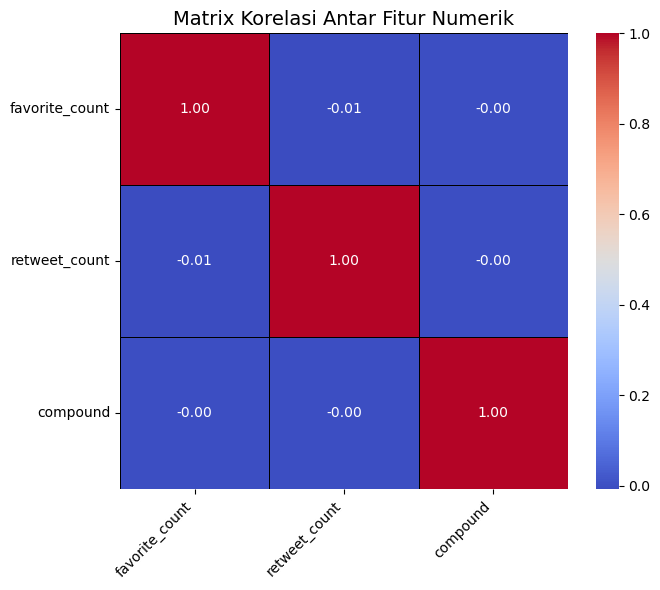

In [60]:
# Kolom Numerik yang Relevan
NUMERIC_COLS = ['favorite_count', 'retweet_count', 'compound'] 

# 1. Konversi Kolom Sentimen (Compound) ke Numerik 
if 'compound' in df.columns:
    df['compound'] = pd.to_numeric(df['compound'], errors='coerce')

# 2. Filter kolom yang ada dan hapus NaN
existing_numeric_cols = [col for col in NUMERIC_COLS if col in df.columns]
df_corr = df[existing_numeric_cols].dropna()

# 3. Hitung dan Visualisasi Korelasi
if len(df_corr) >= 2:
    correlation_matrix = df_corr.corr()
    
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f",
        linewidths=.5,
        linecolor='black'
    )
    plt.title('Matrix Korelasi Antar Fitur Numerik', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')

## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data teks yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Asumsi: X_train, X_test, y_train, y_test sudah terdefinisi dari Data Splitting.

# Inisialisasi model Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

# Membuat prediksi pada data testing <-- BARIS KRUSIAL INI HARUS DIJALANKAN
y_pred_svm = svm_model.predict(X_test)

print("Prediksi model SVM berhasil dibuat!")

Prediksi model SVM berhasil dibuat!


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confussion Matrix

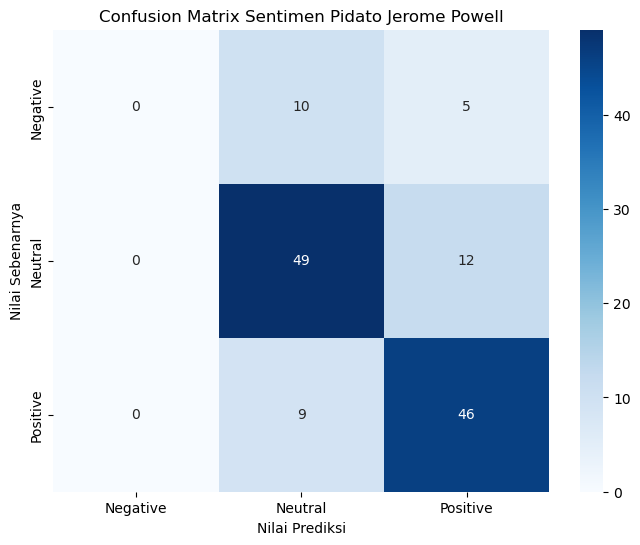

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Dapatkan label unik (Sentimen: Negative, Neutral, Positive)
labels = sorted(y_test.unique())

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels, 
    yticklabels=labels
)
plt.title('Confusion Matrix Sentimen Pidato Jerome Powell')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.show()

#### 2. Laporan Klasifikasi

In [21]:
from sklearn.metrics import classification_report

# Cetak Classification Report
print("--- Classification Report (SVM Model) ---")
print(classification_report(y_test, y_pred_svm))

--- Classification Report (SVM Model) ---
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.72      0.80      0.76        61
    Positive       0.73      0.84      0.78        55

    accuracy                           0.73       131
   macro avg       0.48      0.55      0.51       131
weighted avg       0.64      0.73      0.68       131



c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 

##### Data baru perkalimat 

In [22]:
# Data teks baru yang akan diprediksi
new_statements = [
    "We remain highly attentive to inflation risks and are prepared to adjust policy as appropriate.",
    "The labor market is strong, suggesting durable economic resilience.",
    "There are indications that the pace of rate hikes should slow down.",
    "The outlook for global growth has deteriorated significantly.",
    "We see persistent evidence of downside risks to employment."

]


# Buat DataFrame baru
df_new = pd.DataFrame({'Statement': new_statements})

print("Data Baru yang akan diprediksi:")
print(df_new)

Data Baru yang akan diprediksi:
                                           Statement
0  We remain highly attentive to inflation risks ...
1  The labor market is strong, suggesting durable...
2  There are indications that the pace of rate hi...
3  The outlook for global growth has deteriorated...
4  We see persistent evidence of downside risks t...


##### Data dari kaggle yang sama

In [95]:

# Tentukan path file TXT baru Anda
file_path_new_txt = 'New_statment.txt' 

# Load teks dari file dan pisahkan menjadi kalimat
try:
    with open(file_path_new_txt, 'r', encoding='utf-8') as file:
        full_text_new = file.read()
    
    # Tokenisasi teks menjadi daftar kalimat
    sentences_new = sent_tokenize(full_text_new)
    
    # Buat DataFrame baru
    df_new = pd.DataFrame(sentences_new, columns=['Statement'])
    
    print(f"Data baru berhasil dimuat. Total {len(df_new)} kalimat.")
except FileNotFoundError:
    print(f"Error: File TXT tidak ditemukan di {file_path_new_txt}. Pastikan path benar.")
    df_new = pd.DataFrame({'Statement': []}) # Buat DataFrame kosong agar kode tidak error

Data baru berhasil dimuat. Total 597 kalimat.


#### 2. Pemrosesan Teks Data Baru
Data baru harus melalui semua langkah pra-pemrosesan yang sama persis seperti data pelatihan (Tokenisasi, Stopword Removal, Lemmatization).

In [23]:
# Inisialisasi tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Fungsi pembersihan yang sama dari langkah sebelumnya
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token.isdigit() or token in punctuation or token in stop_words or len(token) <= 1:
            continue
        cleaned_tokens.append(token)
    return cleaned_tokens

# Terapkan semua langkah pre-processing pada df_new

# 1. Tokenisasi & Case Folding
df_new['Tokens'] = df_new['Statement'].apply(lambda x: word_tokenize(x.lower()))

# 2. Stopword Removal & Pembersihan
df_new['Cleaned_Tokens'] = df_new['Tokens'].apply(clean_tokens)

# 3. Lemmatization
df_new['Lemmatized_Tokens'] = df_new['Cleaned_Tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# 4. Gabungkan kembali menjadi teks bersih
df_new['data_bersih'] = df_new['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

print("\nData Baru Setelah Pembersihan:")
print(df_new['data_bersih'])


Data Baru Setelah Pembersihan:
0    remain highly attentive inflation risk prepare...
1    labor market strong suggesting durable economi...
2                       indication pace rate hike slow
3     outlook global growth deteriorated significantly
4     see persistent evidence downside risk employment
Name: data_bersih, dtype: object


#### 3. Vektorisasi Data Baru

In [24]:
# Vektorisasi data baru menggunakan vectorizer yang sudah ada
X_new = tfidf_vectorizer.transform(df_new['data_bersih']).toarray()

print(f"\nBentuk Matriks Fitur Data Baru: {X_new.shape}")


Bentuk Matriks Fitur Data Baru: (5, 1338)


#### 4. Prediksi Menggunakan Model SVM

In [25]:
# Membuat prediksi sentimen
predictions = svm_model.predict(X_new)

# Tambahkan hasil prediksi ke DataFrame baru
df_new['Predicted_Sentiment'] = predictions

# Tampilkan hasil akhir
print("\n--- Hasil Prediksi Sentimen ---")
print(df_new[['Statement', 'Predicted_Sentiment']])


--- Hasil Prediksi Sentimen ---
                                           Statement Predicted_Sentiment
0  We remain highly attentive to inflation risks ...            Positive
1  The labor market is strong, suggesting durable...            Positive
2  There are indications that the pace of rate hi...             Neutral
3  The outlook for global growth has deteriorated...            Positive
4  We see persistent evidence of downside risks t...            Negative


# Virtualisasi

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_484\902934620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


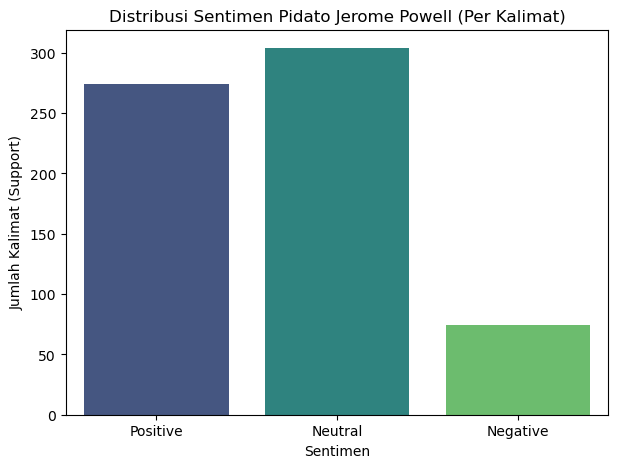

In [26]:

# Asumsi: Kolom 'Sentiment' (hasil VADER) sudah ada di df
plt.figure(figsize=(7, 5))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Distribusi Sentimen Pidato Jerome Powell (Per Kalimat)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Kalimat (Support)')
plt.show()

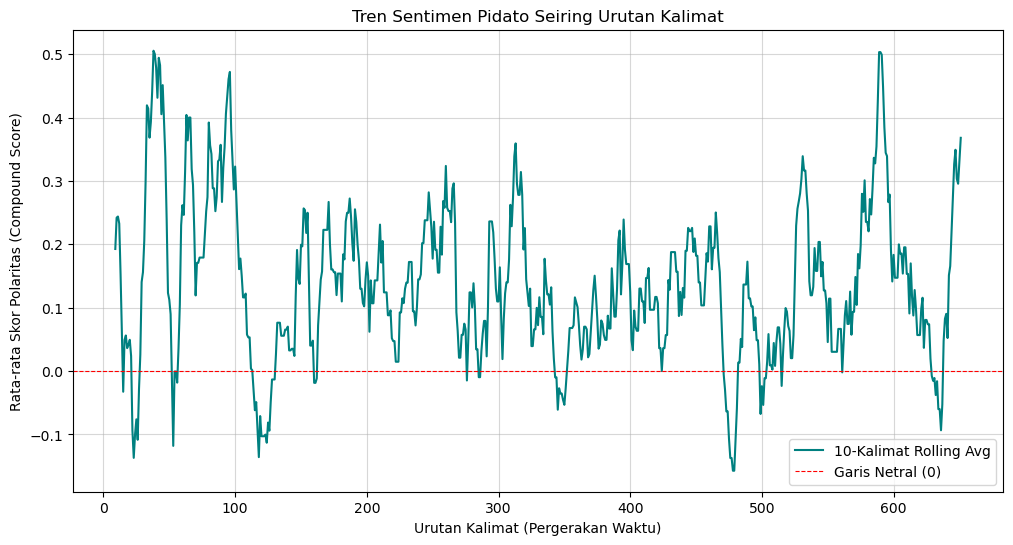

In [27]:
# Pastikan kolom 'Date' adalah datetime dan 'Polarity_Score' sudah ada

# 1. Pastikan data di kelompokkan (jika Anda memiliki data dari banyak tanggal)
# df['Date'] = pd.to_datetime(df['Date'])
# sentiment_over_time = df.groupby(df['Date'].dt.date)['Polarity_Score'].mean().reset_index()

# Untuk contoh ini, kita asumsikan setiap baris adalah urutan waktu
# dan kita gunakan rata-rata rolling window untuk kelancaran visualisasi
window_size = 10
df['Rolling_Polarity'] = df['Polarity_Score'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Polarity'], label=f'{window_size}-Kalimat Rolling Avg', color='teal')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Garis Netral (0)')
plt.title('Tren Sentimen Pidato Seiring Urutan Kalimat')
plt.xlabel(f'Urutan Kalimat (Pergerakan Waktu)')
plt.ylabel('Rata-rata Skor Polaritas (Compound Score)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

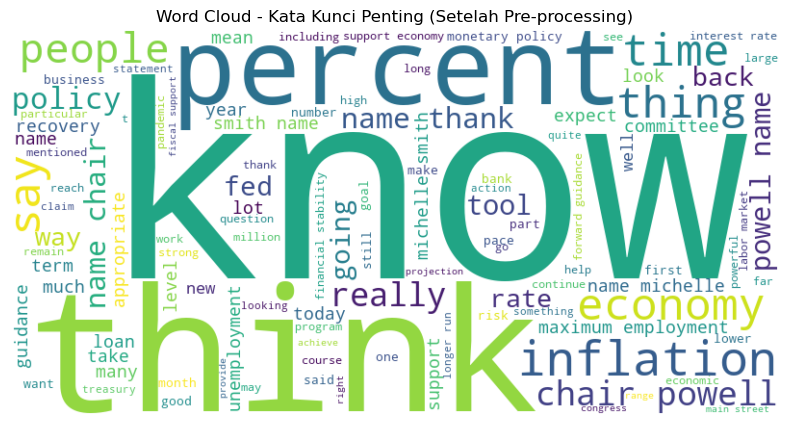

In [28]:
from wordcloud import WordCloud

# Asumsi: Kolom 'Cleaned_Text' (teks bersih setelah pre-processing) sudah ada
all_clean_text = ' '.join(df['Cleaned_Text'].astype(str))

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    min_font_size=10
).generate(all_clean_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata Kunci Penting (Setelah Pre-processing)")
plt.show()